### We need to write a script that will perform the following functions.

1. Track the price of a specific item daily on the Amazon website
2. Save the received data to a file
3. Display a chart of price changes by dates
4. Send an email if the price drops to the specified level

In [2]:
# Import libraries

from bs4 import BeautifulSoup
import requests
import smtplib
import time
import datetime
import pandas as pd
import csv
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# Create empty .csv file with headers

header = ['Title', 'Price', 'Date']
with open('AmazonWebScrapingDataset.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)


In [9]:
# Make a function sending an email

def send_mail():
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.starttls()
    server.login('sender@mail.com', '****************') #how to create app password - https://support.google.com/accounts/answer/185833
    subject = 'Hot price!'
    body = 'You can buy the T-shirt you desired on a low price!\n Click the link - '
    msg = f'Subject: {subject}\n\n{body}'
    server.sendmail('sender@mail.com','recipient@mail.com', msg)
    server.quit()
    

In [10]:
# Make a function, that gets data from Amazon

def check_price():
    
    # The specific page you want to track
    URL = "https://www.amazon.com/TSHIRTAMAZING-Science-Programmer-Statistic-Scientist/dp/B08KGBYZQR/"
    
    #To get info about your browser - https://httpbin.org/get - then change 'User-Agent' info
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(URL, headers=headers)

    soup = BeautifulSoup(page.content, "html.parser") 
    
    # Get the title of product
    title = soup.find(id='productTitle').get_text()
    title = title.strip()
    
    # Get the price of product
    price = soup.select_one('span[class*="a-offscreen"]').get_text()
    price = price.strip()[1:]
    price = float(price)
    
    # Get date
    today = datetime.date.today()
    header = ['Title', 'Price', 'Date']
    data = [title, price, today]
    
    # Append data into the file
    with open('AmazonWebScrapingDataset.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)
    
    # Send email if the price is lower than 21$
    if price<21:
        send_mail()


In [ ]:
# Make a loop to run the function once a day for a month

for i in range(30):
    check_price()
    time.sleep(86400)


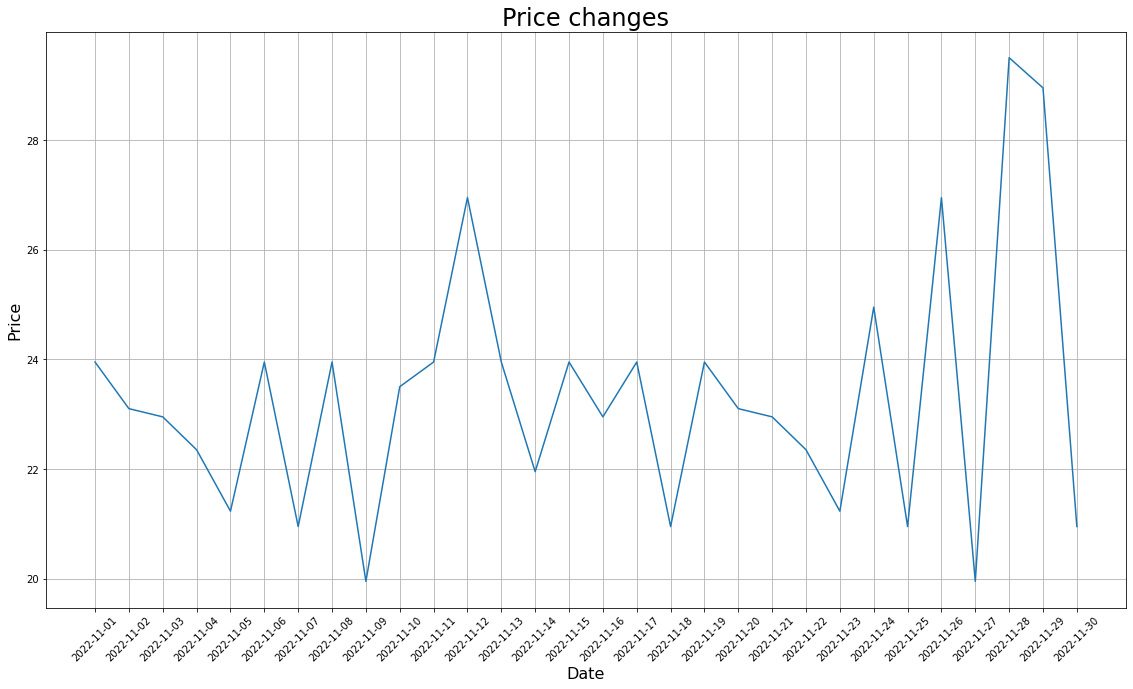

In [5]:
# Make visualization of price changes

data = pd.read_csv('AmazonWebScrapingDataset.csv')
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Price changes', fontsize=24)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Price', fontsize=16)
ax.xaxis.set_tick_params(rotation=45)
ax.grid()
ax.plot(data['Date'], data['Price'])
plt.show()

In [6]:
!pip freeze > requirements.txt